In [1]:
import matplotlib.pyplot as plt
import os
from scipy.io import wavfile
from collections import defaultdict, Counter
from scipy import signal
import numpy as np
import librosa
import random
import tensorflow as tf
from keras import models, layers

In [2]:
audio_data_path = r'C:./set22/train'

In [3]:
#파라미터 설정
sr = 16000
n_mels = 128
# n_ttf = 
# hop_length
# 224 222 220 110 108 106 54  

In [4]:
trainset = []

In [5]:
label_mapping = {'belly_pain': 0, 'discomfort': 1, 'hungry': 2, 'tired': 3}

In [6]:
# 목표로 하는 패딩 크기
target_size = (n_mels, n_mels)

# 폴더 내의 파일을 반복하여 데이터셋에 추가
for class_name in label_mapping.keys():
    class_path = os.path.join(audio_data_path, class_name)
    
    # 클래스 폴더 내의 WAV 파일에 대해 루프 수행
    for filename in os.listdir(class_path):
        if filename.endswith(".wav"):
            try:
                # WAV 파일 읽기
                wav_path = os.path.join(class_path, filename)
                
                wav, sr = librosa.load(wav_path, sr=None, mono=True, duration=5.0)

                # Mel-spectrogram
                mels_spec = librosa.feature.melspectrogram(y=wav, sr= sr, n_mels= n_mels)
                
                # 패딩 또는 자르기 작업
                if mels_spec.shape[1] > target_size[1]:
                    # 자르기
                    padded_mels = mels_spec[:, :target_size[1]]
                else:
                    # 패딩
                    pad_width = target_size[1] - mels_spec.shape[1]
                    padded_mels = np.pad(mels_spec, ((0, 0), (0, pad_width)), mode='constant')
                
                # 라벨 할당
                label = label_mapping[class_name]
                
                # 데이터와 라벨을 trainset에 추가
                trainset.append((padded_mels, label))
                
            except Exception as e:
                print(f'Error processing {filename}: {e}')

In [7]:
# 패딩된 MFCC 배열 확인
for padded_mels, label in trainset:
    print(f'Mel_spec 크기: {padded_mels.shape}, 라벨: {label}')

Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec 크기: (128, 128), 라벨: 0
Mel_spec

In [8]:
len(trainset)

340

In [9]:
trainset[0][1]

0

In [10]:
trainset_np = np.array(trainset, dtype=object)

In [11]:
trainset_np.shape

(340, 2)

In [12]:
from sklearn.model_selection import train_test_split

# trainset을 데이터와 라벨로 나누기
X = np.array([item[0] for item in trainset])
y = np.array([item[1] for item in trainset])

# 훈련 세트와 테스트 세트로 나누기 (예: 훈련 세트 80%, 테스트 세트 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #, random_state=1024

# 결과 확인
print(f"훈련 세트 크기: {X_train.shape}, 라벨 크기: {y_train.shape}")
print(f"테스트 세트 크기: {X_test.shape}, 라벨 크기: {y_test.shape}")


훈련 세트 크기: (272, 128, 128), 라벨 크기: (272,)
테스트 세트 크기: (68, 128, 128), 라벨 크기: (68,)


In [13]:
# X_train의 차원을 (샘플 수, 98, 98, 1)로 조정
X_train_dim = X_train.reshape(X_train.shape + (1,))
X_test_dim = X_test.reshape(X_test.shape + (1,))

In [14]:
X_train_dim[0].shape

(128, 128, 1)

In [15]:

load_encoder = tf.keras.models.load_model('autoencoder_relu2.h5')

load_encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                           

In [16]:
freeze_layer = 9

In [17]:
for layer in load_encoder.layers[:freeze_layer]:
    layer.trainable = False

In [18]:
load_encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 64)        36928     
                                                           

In [19]:
inputs = layers.Input(shape= X_train_dim[0].shape)

input_layer = load_encoder(inputs)

# MSE -> input & output 비교
full01 = layers.Flatten()(input_layer)
dense01 = layers.Dense(1024, activation='relu')(full01)
batch01 = layers.BatchNormalization()(dense01)
drop01 = layers.Dropout(0.25)(batch01)

dense02 = layers.Dense(512, activation='relu')(drop01)
batch02 = layers.BatchNormalization()(dense02)
drop02 = layers.Dropout(0.25)(dense02)

dense03 = layers.Dense(128, activation='relu')(drop02)
batch03 = layers.BatchNormalization()(dense03)
drop03 = layers.Dropout(0.25)(dense03)



out_layer = layers.Dense(4, activation='softmax')(drop03)



model = tf.keras.Model(inputs=inputs, outputs=out_layer)



model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 model_1 (Functional)        (None, 16, 16, 256)       1171680   
                                                                 
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 1024)              67109888  
                                                                 
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                             

In [20]:
# Compile and train your model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_dim, y_train, epochs=35,  validation_data = (X_test_dim, y_test))

Epoch 1/35


9/9 [==============================] - 7s 202ms/step - loss: 1.6226 - accuracy: 0.3750 - val_loss: 1.1391 - val_accuracy: 0.5882
Epoch 2/35
9/9 [==============================] - 0s 42ms/step - loss: 1.3309 - accuracy: 0.5037 - val_loss: 1.4428 - val_accuracy: 0.4706
Epoch 3/35
9/9 [==============================] - 0s 43ms/step - loss: 1.0659 - accuracy: 0.4963 - val_loss: 1.4438 - val_accuracy: 0.4118
Epoch 4/35
9/9 [==============================] - 0s 55ms/step - loss: 0.9860 - accuracy: 0.6066 - val_loss: 2.0063 - val_accuracy: 0.5000
Epoch 5/35
9/9 [==============================] - 0s 44ms/step - loss: 0.8342 - accuracy: 0.6691 - val_loss: 1.3399 - val_accuracy: 0.5000
Epoch 6/35
9/9 [==============================] - 0s 41ms/step - loss: 0.7572 - accuracy: 0.6728 - val_loss: 1.3569 - val_accuracy: 0.5588
Epoch 7/35
9/9 [==============================] - 0s 45ms/step - loss: 0.6716 - accuracy: 0.7059 - val_loss: 1.7424 - val_accuracy: 0.5147
Epoch 8/35
9/9 [=====================

C:\Users\Desk_Kang\AppData\Local\Temp\ipykernel_1900\237002889.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


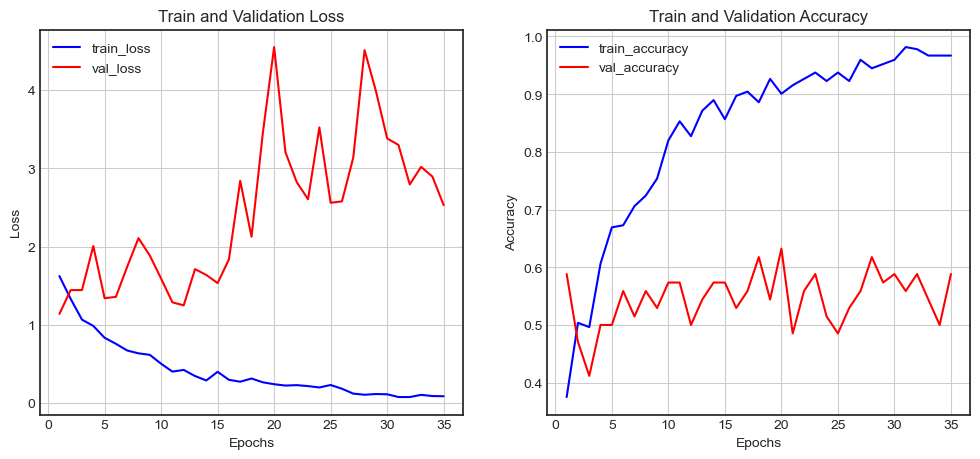

In [21]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [22]:
predictions = model.predict(X_test_dim)

3/3 [==============================] - 0s 12ms/step


In [23]:
pred_label = np.argmax(predictions, axis=1)

In [24]:
y_test

array([0, 2, 1, 1, 2, 2, 3, 0, 3, 2, 1, 1, 1, 1, 1, 2, 2, 2, 0, 1, 1, 2,
       1, 2, 1, 1, 0, 2, 2, 0, 3, 1, 0, 1, 1, 1, 2, 2, 2, 1, 1, 2, 3, 2,
       1, 2, 2, 2, 3, 1, 3, 3, 1, 0, 0, 1, 1, 2, 1, 3, 3, 3, 1, 0, 1, 1,
       2, 2])

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, pred_label)


print(conf_matrix)

[[ 3  4  2  0]
 [ 2 18  4  3]
 [ 0  3 15  4]
 [ 2  3  1  4]]


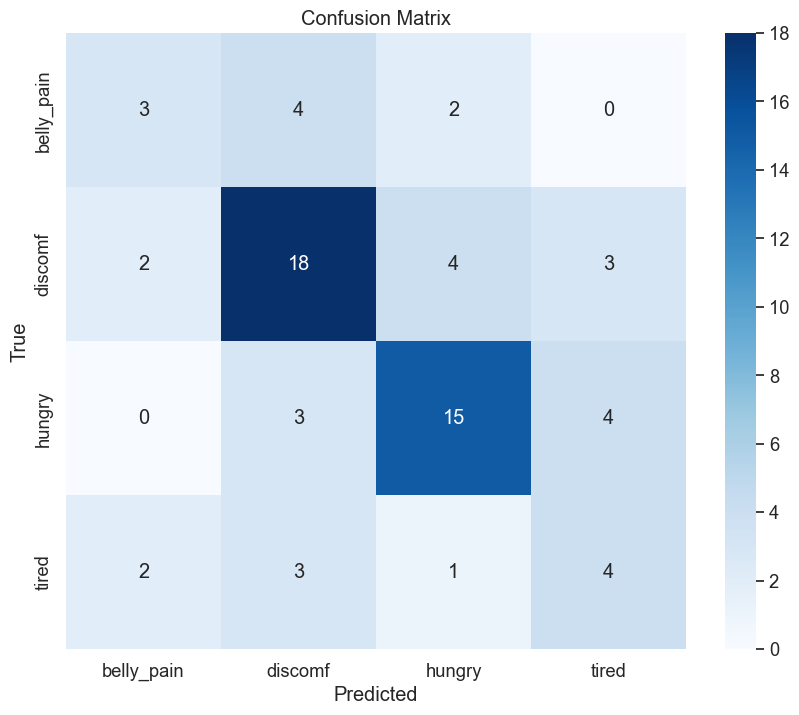

In [26]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)  # 폰트 크기 조절
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['belly_pain', 'discomf', 'hungry', 'tired'], yticklabels=['belly_pain', 'discomf', 'hungry', 'tired'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
model.evaluate(X_test_dim, y_test)

3/3 [==============================] - 0s 14ms/step - loss: 2.5283 - accuracy: 0.5882


[2.528256416320801, 0.5882353186607361]

In [29]:
model.save('loadencoder(set22)_freeze_relu(0.58).h5')